In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/qlik/escalation_project/train_9_27

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-140-33ac9f05050d>", line 4, in <cell line: 4>
    get_ipython().run_line_magic('cd', '/gdrive/MyDrive/qlik/escalation_project/train_9_27')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-140-33ac9f05050d>", line 4, in <cell line: 4>
    get_ipython().run_line_magic('cd', '/gdrive/MyDrive/qlik/escalation_project/train_9_27')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-p

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
test_df = pd.read_csv("test_sentiment.csv")
test_df.shape

(58000, 35)

In [4]:
test_prediction = pd.read_csv("test_prediction.csv")
test_prediction.shape

(58000, 4)

In [5]:
test_prediction_with_sentiment = pd.read_csv("test_prediction_with_sentiment.csv")
test_prediction_with_sentiment.shape

(58000, 4)

In [66]:
test_prediction_with_sentiment_shap = pd.read_csv("test_prediction_with_sentiment_shap.csv")
test_prediction_with_sentiment_shap.columns = [name[name.find('.')+1:] for name in test_prediction_with_sentiment_shap.keys()]
test_prediction_with_sentiment_shap = test_prediction_with_sentiment_shap[test_prediction_with_sentiment_shap.keys()[1:]]
test_prediction_with_sentiment_shap.shape

(58000, 25)

In [6]:
test_pred = test_prediction[test_prediction.keys()[1:]]
test_pred.shape

(58000, 3)

In [11]:
print("test prediction without sentiment features")
precision = precision_score(test_df.HAS_ESCALATED_VAL, test_pred.HAS_ESCALATED_VAL_predicted)
accuracy = accuracy_score(test_df.HAS_ESCALATED_VAL, test_pred.HAS_ESCALATED_VAL_predicted)

print("precision = {}".format(precision))
print("accuracy = {}".format(accuracy))

test prediction without sentiment features
precision = 0.547394540942928
accuracy = 0.9338793103448276


In [138]:
from sklearn.metrics import precision_score, accuracy_score

In [139]:
precision_score(test_df.HAS_ESCALATED_VAL, test_prediction_with_sentiment['test_sentiment_Prediction_with_sentiment.HAS_ESCALATED_VAL_predicted'])

0.5372786579683131

In [12]:
print("test prediction with sentiment features")
precision = precision_score(test_df.HAS_ESCALATED_VAL, test_prediction_with_sentiment['test_sentiment_Prediction_with_sentiment.HAS_ESCALATED_VAL_predicted'])
accuracy = accuracy_score(test_df.HAS_ESCALATED_VAL, test_prediction_with_sentiment['test_sentiment_Prediction_with_sentiment.HAS_ESCALATED_VAL_predicted'])

print("precision = {}".format(precision))
print("accuracy = {}".format(accuracy))

test prediction with sentiment features
precision = 0.5372786579683131
accuracy = 0.9333448275862068


In [22]:
test_pred_sent = test_prediction_with_sentiment[test_prediction_with_sentiment.keys()[1:]]

names = test_pred_sent.keys()
names = [name[name.find('.')+1:] for name in names]
# test_pred_sent.columns = names
test_pred_sent.columns = ['pred', 'prop_0', 'prop_1']

In [137]:
def getPlots(check_idx):

  check_parent_id = getParentIdGivenidx(check_idx)
  cur_case = test_pred[test_pred['parent_id'] == check_parent_id].sort_values(by='created_at')
  # cur_case.set_index('created_at', inplace = True)



  # Create a line plot for 'value1'
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  try:
    axs = axs.flatten()
  except:
    pass

  # fig.set
  # every comment
  cur_case.plot(x="created_at", y=["prop_1", "sentiment_score"], ax = axs[0])
  # axs[0].plot(cur_case['created_at'], cur_case['prop_1'], label = 'escalated_rate')
  # axs[0].plot(cur_case['created_at'], cur_case['sentiment_score'], label = 'sentiment_score')
  axs[0].set_title("every comment")
  axs[0].legend()
  axs[0].tick_params(labelrotation=45)

  # customer comment
  # mask = cur_case['customer_comment_boo']
  customer_masked_cur_case = cur_case[cur_case['customer_comment_boo'].to_numpy().astype(np.bool)]
  customer_masked_cur_case.plot(x="created_at", y=["prop_1", "sentiment_score"], ax = axs[1])
  axs[1].set_title("customer comment only")
  axs[1].legend()
  axs[1].tick_params(labelrotation=45)


  #shap
  shap_columns = [name for name in cur_case.keys() if 'shap' in name]
  cur_case_avg_shap = cur_case[shap_columns].mean(axis = 0).sort_values()
  cur_case_avg_shap.plot.bar(ax = axs[2])
  axs[2].set_title("avg shap values")

  fig.suptitle("case {}".format(check_parent_id))

In [ ]:
def getShapPlotsAtDifferentTimestamp(check_idx):

  check_parent_id = getParentIdGivenidx(check_idx)
  cur_case = test_pred[test_pred['parent_id'] == check_parent_id].sort_values(by='created_at')

  # Create a line plot for 'value1'
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  try:
    axs = axs.flatten()
  except:
    pass


  # customer comment
  # mask = cur_case['customer_comment_boo']
  customer_masked_cur_case = cur_case[cur_case['customer_comment_boo'].to_numpy().astype(np.bool)]
  customer_masked_cur_case.plot(x="created_at", y=["prop_1", "sentiment_score"], ax = axs[1])
  axs[1].set_title("customer comment only")
  axs[1].legend()
  axs[1].tick_params(labelrotation=45)


  #shap
  shap_columns = [name for name in cur_case.keys() if 'shap' in name]
  cur_case_avg_shap = cur_case[shap_columns].mean(axis = 0).sort_values()
  cur_case_avg_shap.plot.bar(ax = axs[2])
  axs[2].set_title("avg shap values")

  fig.suptitle("case {}".format(check_parent_id))

In [67]:
test_pred = pd.concat([test_df, test_pred_sent, test_prediction_with_sentiment_shap], axis = 1 )
test_pred.columns = [name.lower() for name in test_pred.keys()]

In [121]:
parent_id_test_agg = test_pred.groupby('parent_id').agg(
  count=pd.NamedAgg(column="pred", aggfunc="count"),
  sum_pred=pd.NamedAgg(column="pred", aggfunc="sum"),
  avg_prop_1=pd.NamedAgg(column="prop_1", aggfunc="mean"),
  avg_sentiment_score = pd.NamedAgg(column="sentiment_score", aggfunc="mean"),
  escalate_label = pd.NamedAgg(column="has_escalated_val", aggfunc="mean")
).reset_index()

In [123]:
# top 5 avg_prop_1
parent_id_test_agg.loc[test_agg.avg_prop_1.nlargest(5).index]

,parent_id,count,sum_pred,avg_prop_1,avg_sentiment_score,escalate_label
1708,5003z00002hRMa0AAG,62,62,0.994668,0.599326,1.0
143,5003z00002fRHZoAAO,7,7,0.994478,0.597608,1.0
339,5003z00002gl0LpAAI,36,36,0.993011,0.621980,1.0
140,5003z00002fQsonAAC,1,1,0.990348,0.597414,1.0
378,5003z00002glZ0LAAU,12,12,0.990258,0.677074,1.0


In [124]:
# top 5 avg_prop_1 where there are changes in comment's predictions
mask = parent_id_test_agg['count'] != parent_id_test_agg['sum_pred']
top_avg_prop_1_test_agg = parent_id_test_agg.loc[parent_id_test_agg[mask].avg_prop_1.nlargest(5).index]
top_avg_prop_1_test_agg

,parent_id,count,sum_pred,avg_prop_1,avg_sentiment_score,escalate_label
772,5003z00002gzGxLAAU,21,18,0.825446,0.602572,1.0
1622,5003z00002hQmRWAA0,8,6,0.738333,0.594403,1.0
262,5003z00002g7dfBAAQ,18,13,0.721140,0.589139,1.0
1624,5003z00002hQmThAAK,7,5,0.703922,0.700541,1.0
278,5003z00002g85LpAAI,49,34,0.701598,0.634171,1.0


In [112]:
def getParentIdGivenidx(idx):
  return parent_id_test_agg['parent_id'][idx]

<ipython-input-114-058d99d089a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  customer_masked_cur_case = cur_case[cur_case['customer_comment_boo'].to_numpy().astype(np.bool)]


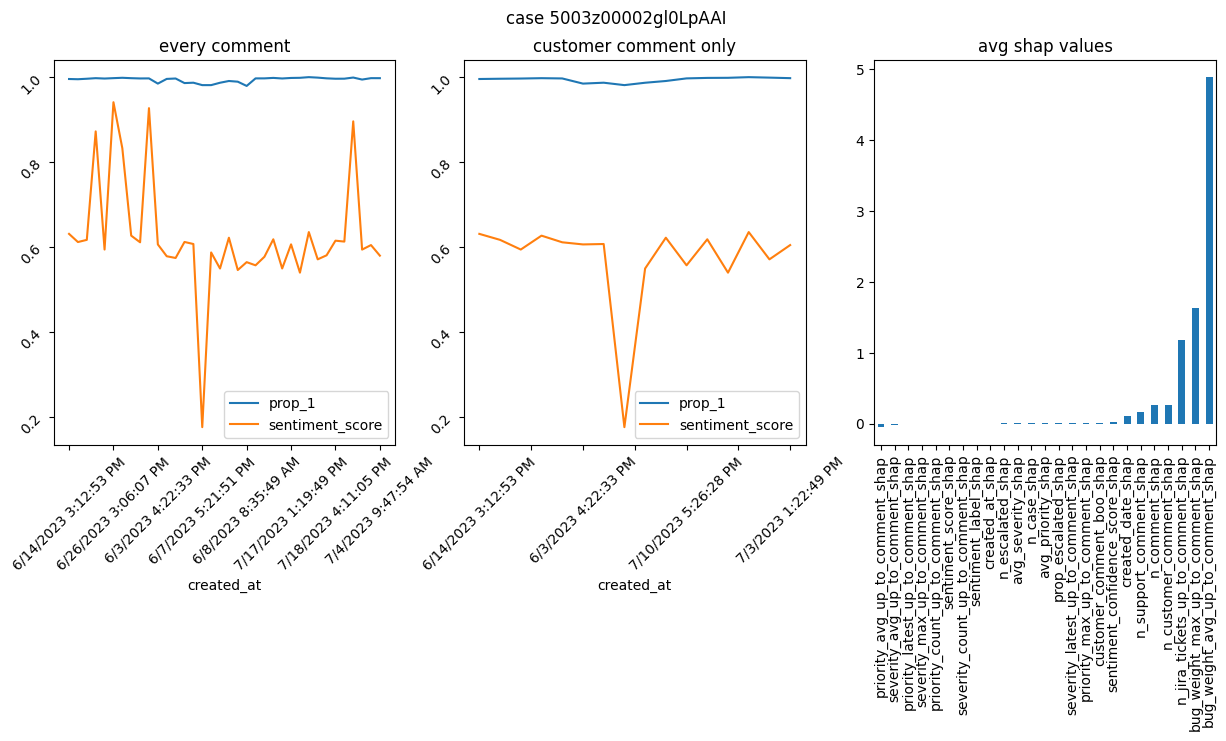

In [136]:
check_idx = 339
getPlots(check_idx)

<ipython-input-114-058d99d089a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  customer_masked_cur_case = cur_case[cur_case['customer_comment_boo'].to_numpy().astype(np.bool)]


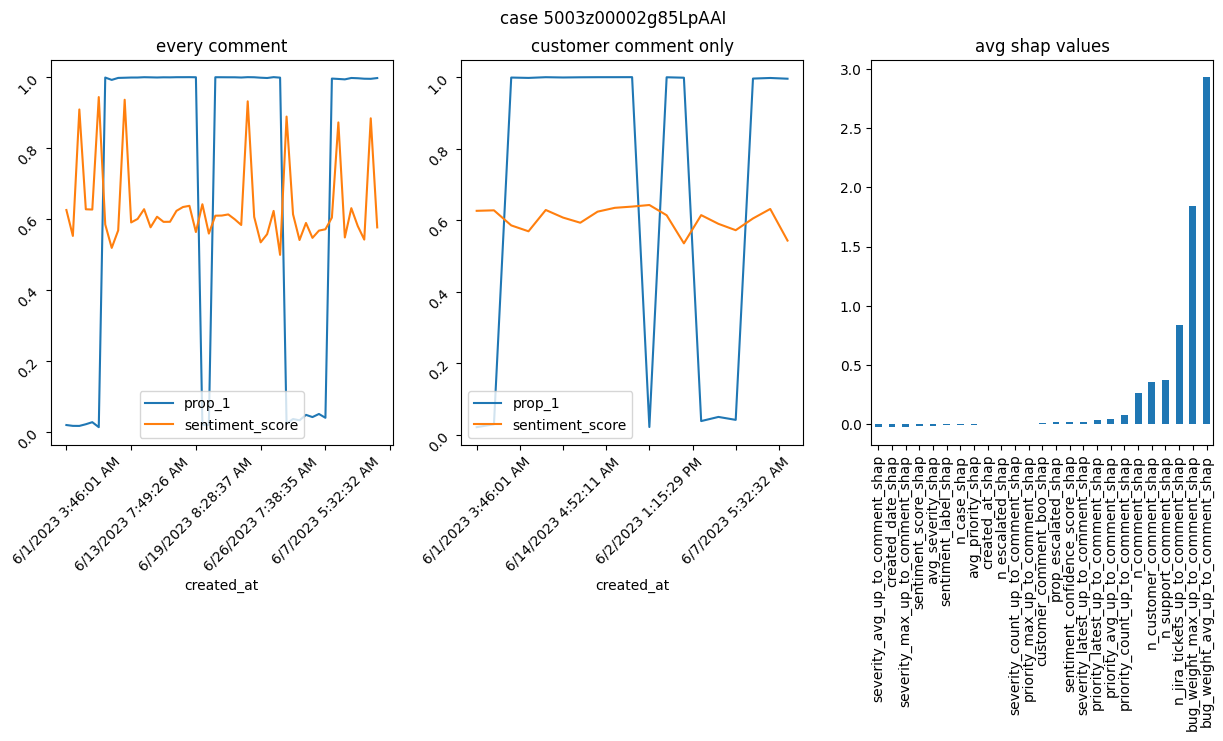

In [116]:
check_idx = 278
getPlots(check_idx)

In [107]:
top_avg_prop_1_test_agg = parent_id_test_agg.loc[parent_id_test_agg[mask].avg_prop_1.nlargest(5).index]
top_avg_prop_1_test_agg

In [134]:
temp = parent_id_test_agg[parent_id_test_agg.escalate_label == 1].sort_values('avg_sentiment_score').head(30)
# lowest_sentiment_score_mask = parent_id_test_agg[mask].avg_sentiment_score.nsmallest(5).index
# lowest_sentiment_score_mask
temp

,parent_id,count,sum_pred,avg_prop_1,avg_sentiment_score,escalate_label
22,5003z00002bIh8QAAS,1,1,0.554983,0.158993,1.0
386,5003z00002glkHvAAI,2,0,0.190732,0.386164,1.0
151,5003z00002fRUjmAAG,2,2,0.988648,0.433440,1.0
120,5003z00002fQH4IAAW,3,0,0.018975,0.464959,1.0
357,5003z00002glAszAAE,3,3,0.943386,0.468641,1.0
6738,5003z00002jR2JHAA0,6,0,0.025582,0.492815,1.0
6919,5003z00002jRKruAAG,4,4,0.867761,0.492844,1.0
30,5003z00002bwnTMAAY,1,1,0.844894,0.496379,1.0
99,5003z00002erDoBAAU,3,3,0.666084,0.520974,1.0
358,5003z00002glCAcAAM,7,7,0.973503,0.521938,1.0


In [93]:
shap_columns = [name for name in cur_case.keys() if 'shap' in name ]
cur_case[shap_columns].mean(axis = 0).sort_values()

<ipython-input-114-058d99d089a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  customer_masked_cur_case = cur_case[cur_case['customer_comment_boo'].to_numpy().astype(np.bool)]


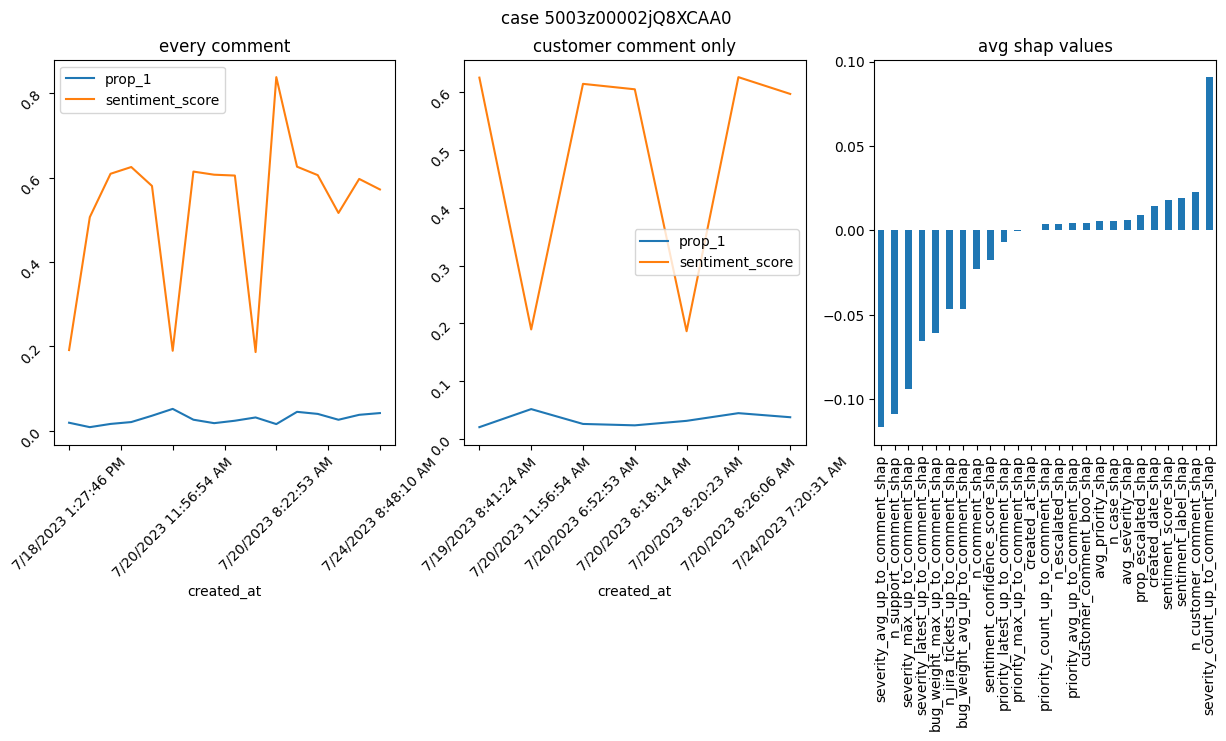

In [135]:
check_idx = 6209
getPlots(check_idx)

In [103]:
temp = cur_case[shap_columns].mean(axis = 0).sort_values()

<Axes: >

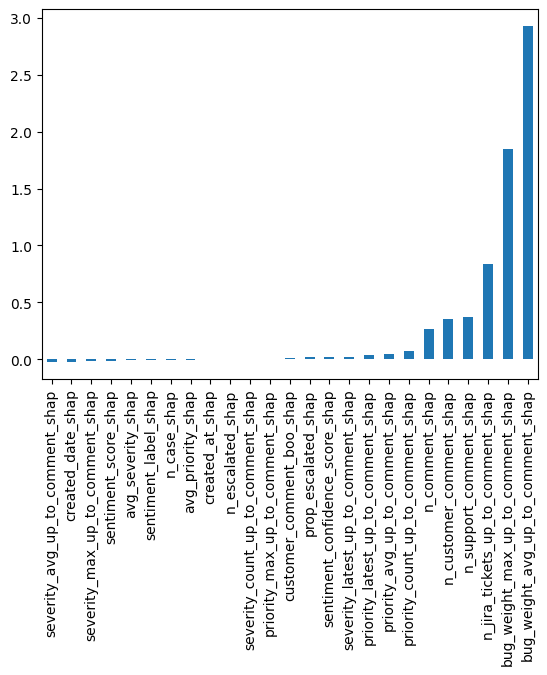

In [104]:
temp.plot.bar()